In [ ]:
# PHY 4268 - RATTRAPAGE


NGOUEMO BARBINE, 22v2221, barbine.ngouemo@facsciences-uy1.cm


Department of Physics - Faculty of Science - University of Yaoundé I

PNR

10/07/2023

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [1]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2023.03.1
2.2.1


In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

2-)representation des atomes dhydrogenes en 2D

In [4]:
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem,QED, PandasTools, Descriptors

In [9]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

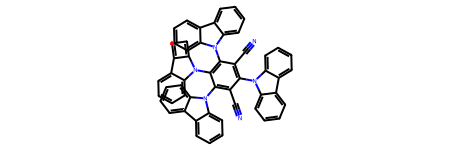

In [13]:
smi = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

3-)Determinons les proprietes 

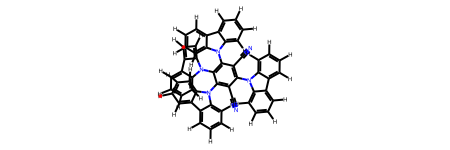

In [14]:
m1 = AllChem.AddHs(m)
m1

In [16]:
adj = Chem.rdmolops.GetAdjacencyMatrix(m)
adj ## Adjacency matrix : a(i,j) == 1 if atom pair (i,j) is connected and 0 lse.

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [17]:
for atom in m.GetAtoms():
    print (atom.GetIdx(), "th atom is ", atom.GetSymbol(), ", total number of hydrogens is", atom.GetTotalNumHs(), 
           ", and aromaticity indicator is", atom.GetIsAromatic())

0 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
1 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
2 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
3 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
4 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
5 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
6 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
7 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
8 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
9 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
10 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
11 th atom is  C , total number of hydrogens is 0 , and aromatic

In [19]:
molwt = Descriptors.ExactMolWt(m)
logP = Descriptors.MolLogP(m)
tpsa = Descriptors.TPSA(m)
Qed = Chem.QED.qed(m)

print(f'Our molecular properties are:\n Molecular weight:{molwt}, \t polarity:{tpsa}, \t solubility:{logP}, \t Quantitative drug-likeness:{Qed}')

Our molecular properties are:
 Molecular weight:762.2531949600001, 	 polarity:67.3, 	 solubility:11.239759999999983, 	 Quantitative drug-likeness:0.17915915459277462


4-)

In [22]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Allchem

mol=AllChem.MolFromsmiles('C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N)
rdkit.Chem.AllChem.EmbedMolecule(mol)
rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
rdkit.Chem.MOlToXYZFile(mol, 'barbine_ngouemo_4CzIPN.XYZ')

SyntaxError: EOL while scanning string literal (2773371486.py, line 5)

In [20]:
rdkit.Chem.AllChem.EmbedMolecule(mol)
rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
rdkit.Chem.MOlToXYZFile(mol, 'barbine_ngouemo_4CzIPN.XYZ')

NameError: name 'mol' is not defined

In [ ]:
6-  


   CzIPN_mol = pyscf.gto.M(atom=open('barbine_ngouemo_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    print(f''Valeur de lenergie nucleaire
